In [ ]:
# Домашнее задание к лекции «Задачи классификации и кластеризации»

# Задание.
# 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
# 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
# 3. Разделите данные на выборку для обучения и тестирования
# 4. Постройте модель LDA
# 5. Визуализируйте предсказания для тестовой выборки и центры классов
# 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
# 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Настройка графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

In [6]:
iris = load_iris()
print(iris.DESCR)
iris

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [65]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df[['sepal length (cm)', 'sepal width (cm)']]
df['variety'] = iris['target']
df_variety = df['variety']
print(df)
df_variety

     sepal length (cm)  sepal width (cm)  variety
0                  5.1               3.5        0
1                  4.9               3.0        0
2                  4.7               3.2        0
3                  4.6               3.1        0
4                  5.0               3.6        0
..                 ...               ...      ...
145                6.7               3.0        2
146                6.3               2.5        2
147                6.5               3.0        2
148                6.2               3.4        2
149                5.9               3.0        2

[150 rows x 3 columns]


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int32

In [84]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, iris.target, test_size=0.33, random_state=42)

In [85]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

100
50
100
50


In [86]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [87]:
lda = LinearDiscriminantAnalysis()

In [88]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [89]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0,
       0, 1, 2, 2, 2, 2])

In [90]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [91]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(y_test, lda.predict(X_test))

0.84

In [93]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.50245893,  8.1129911 ,  0.        ],
       [ 1.32461209, -3.78911741,  0.        ],
       [ 3.65337657, -3.4965769 ,  0.        ]])

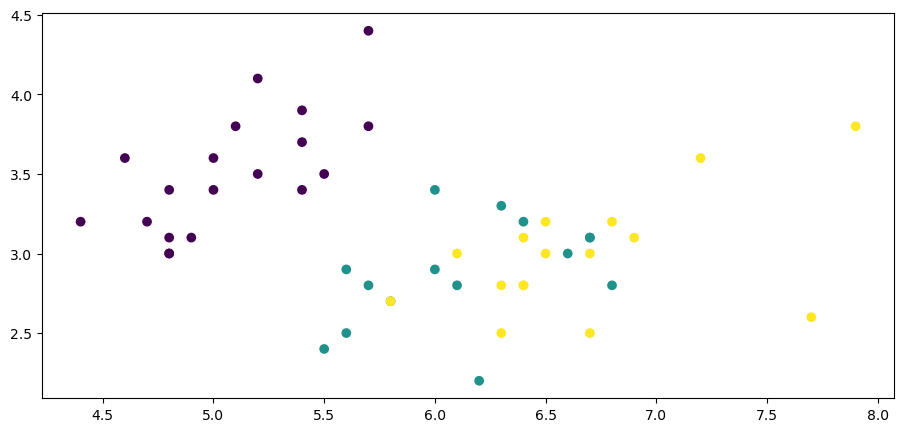

In [94]:
# тестовая выборка
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)

In [95]:
y_pred = lda.predict(X_test)

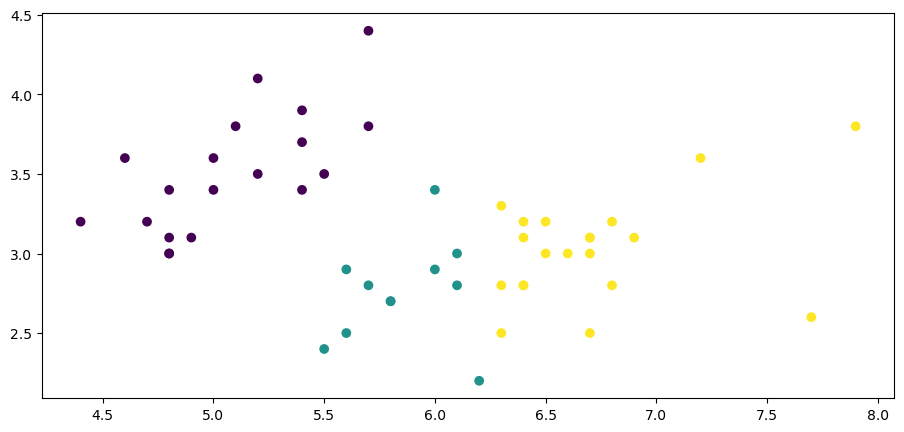

In [96]:
# предсказания для тестовой выборки
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_pred)

In [97]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_test, y_pred)

LinearDiscriminantAnalysis()

In [98]:
# центры классов
lda.means_

array([[5.07368421, 3.51052632, 0.        ],
       [5.85454545, 2.75454545, 1.18181818],
       [6.71      , 3.025     , 1.7       ]])

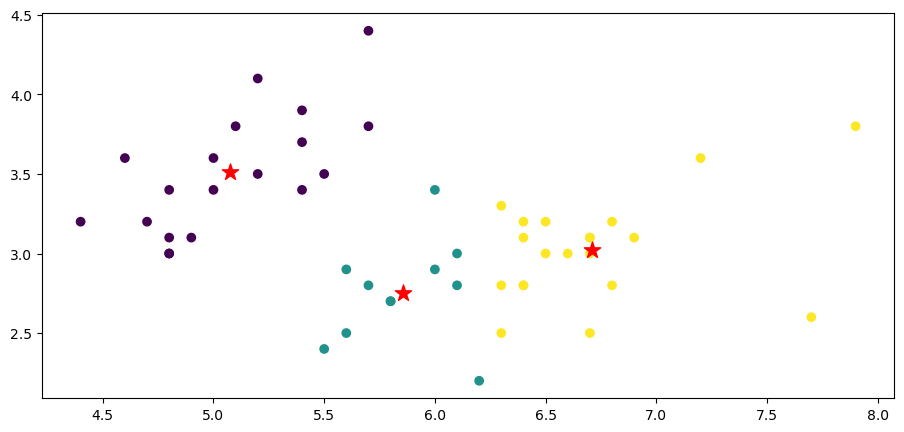

In [99]:
# сам scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_pred)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')


In [102]:
# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

df = df.drop(columns=['variety'])
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
#Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [103]:
arr = df[['sepal length (cm)', 'sepal width (cm)']].to_numpy()

In [104]:
arr

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

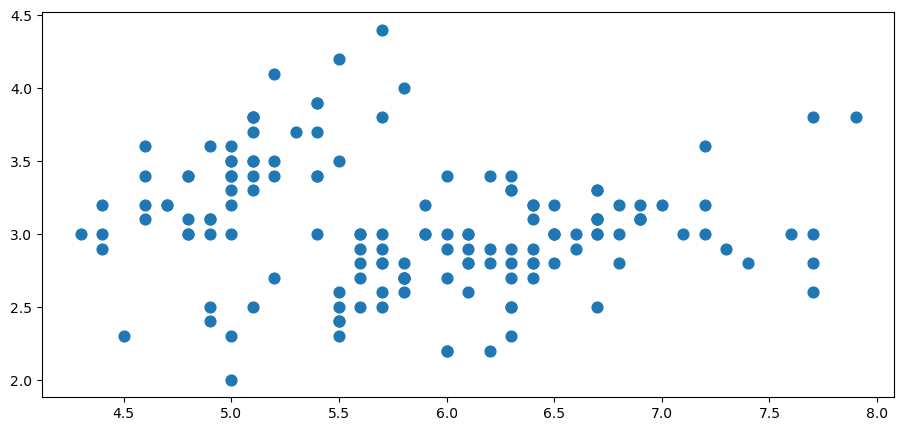

In [109]:
plt.scatter(arr[:, 0], arr[:, 1],cmap='autumn', s=60)

In [110]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()

In [116]:
arr_scaled = scaler.fit_transform(arr)
arr_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

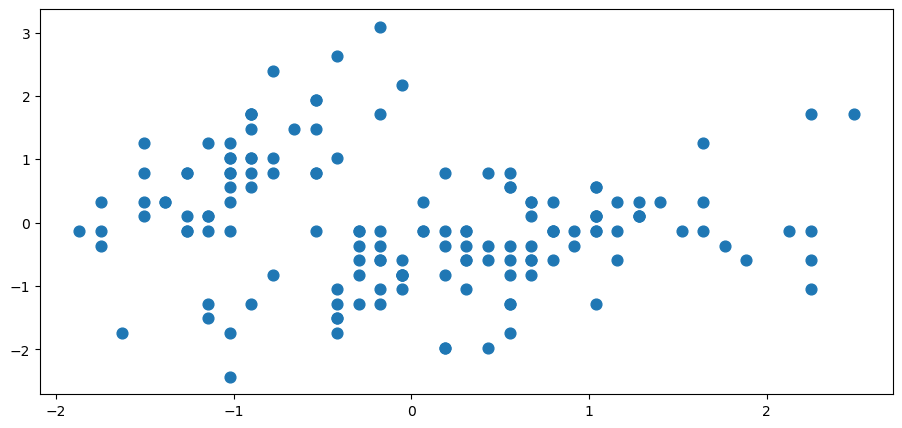

In [117]:
plt.scatter(arr_scaled[:, 0], arr_scaled[:, 1],cmap='autumn', s=60)

In [118]:
from sklearn.cluster import KMeans

d:\Program\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


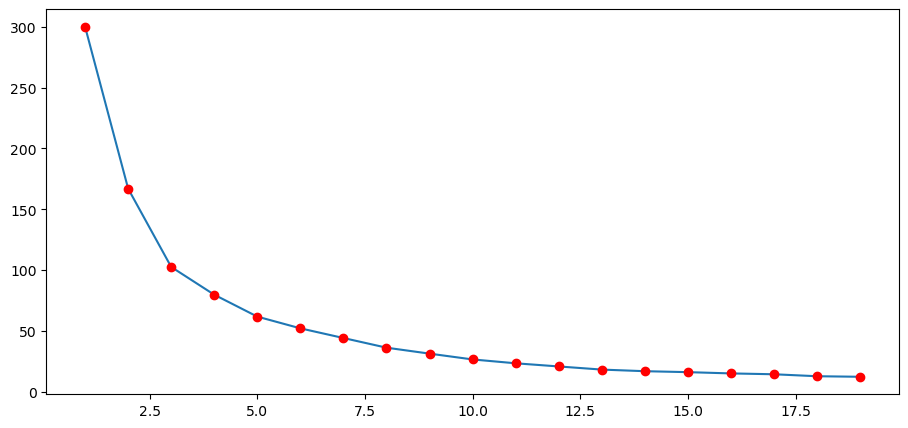

In [120]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(arr_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

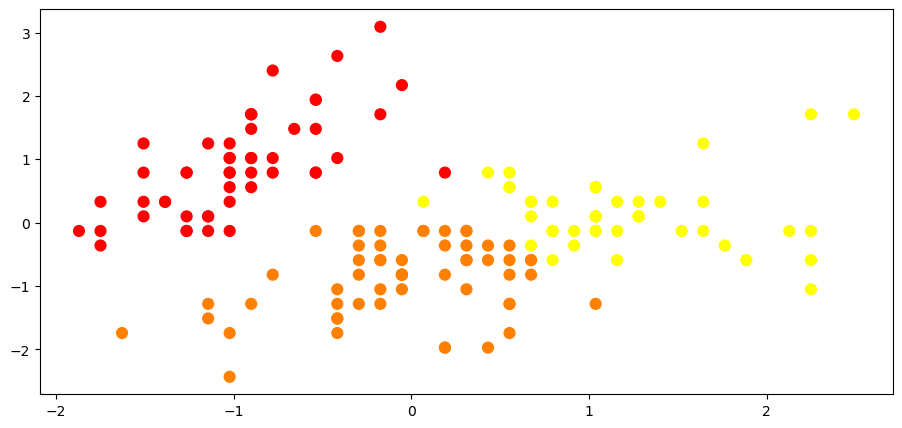

In [126]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(arr_scaled)
clusters
plt.scatter(arr_scaled[:, 0], arr_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [130]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

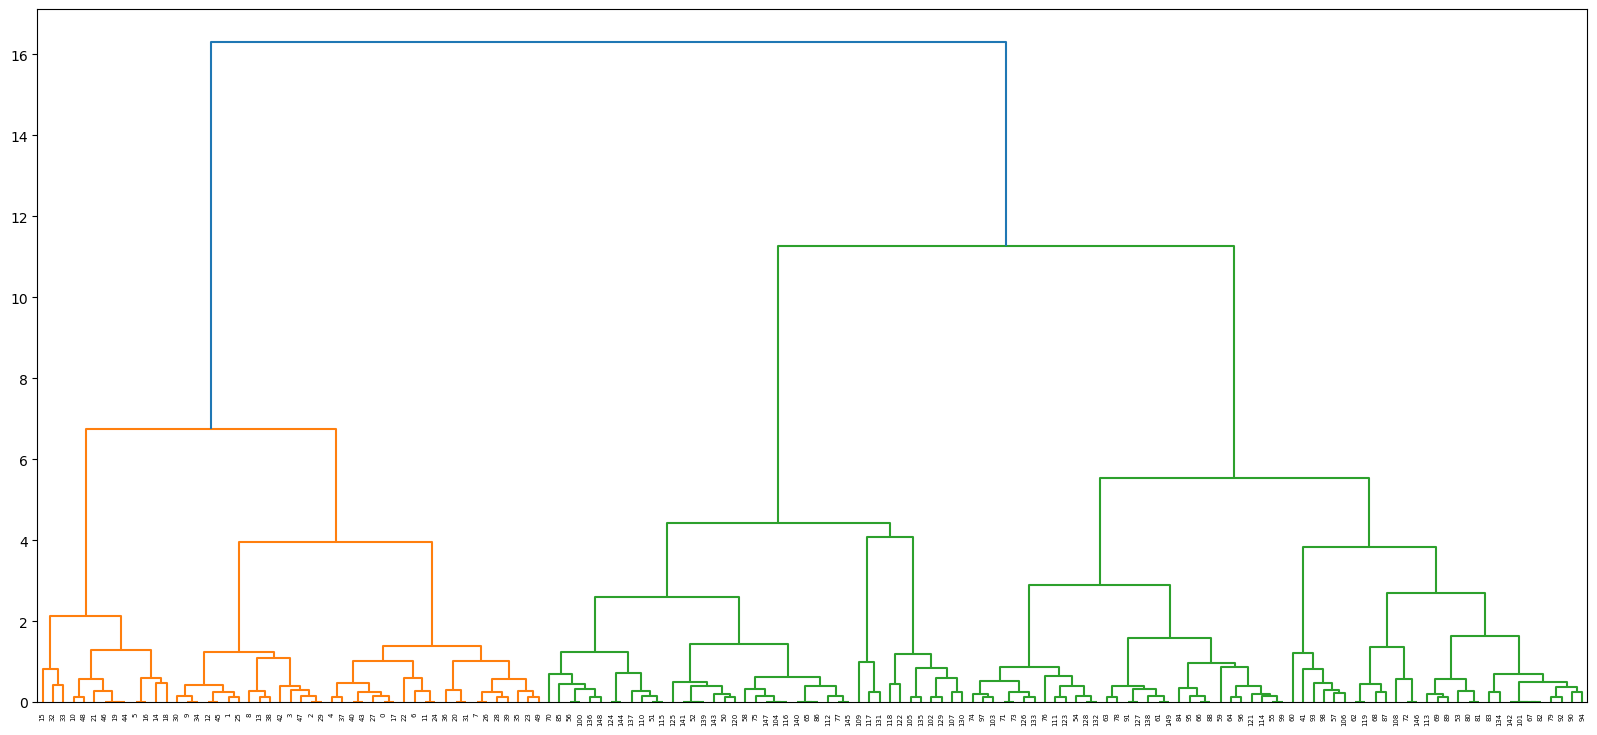

In [131]:
# строим дендрограмму
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
distance_mat = pdist(arr_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [ ]:
# видно что 3 кластера должно быть по ДВУМ методам